<a href="https://colab.research.google.com/github/YugantGotmare/Deep_learning_project/blob/main/Diabetes_Classification_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
267,2,128,64,42,0,40.0,1.101,24,0
161,7,102,74,40,105,37.2,0.204,45,0
190,3,111,62,0,0,22.6,0.142,21,0


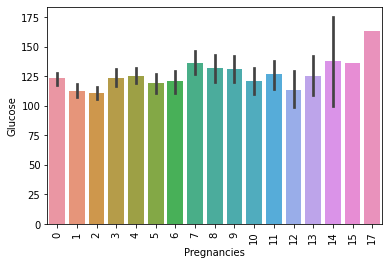

In [10]:
sns.barplot(x=df['Pregnancies'],y=df['Glucose'])
plt.xticks(rotation='vertical')
plt.show()

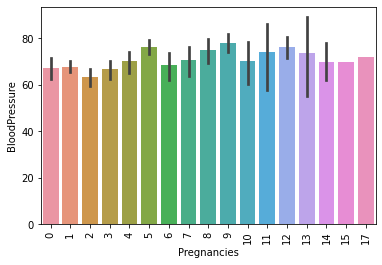

In [11]:
sns.barplot(x=df['Pregnancies'],y=df['BloodPressure'])
plt.xticks(rotation='vertical')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [13]:
x = df.drop(columns='Outcome')
y = df['Outcome']

In [14]:
x.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
765,5,121,72,23,112,26.2,0.245,30
130,4,173,70,14,168,29.7,0.361,33
255,1,113,64,35,0,33.6,0.543,21


In [15]:
y.sample(3)

537    0
546    1
646    1
Name: Outcome, dtype: int64

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [17]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
120,0,162,76,56,100,53.2,0.759,25
172,2,87,0,23,0,28.9,0.773,25
307,0,137,68,14,148,24.8,0.143,21
7,10,115,0,0,0,35.3,0.134,29
448,0,104,64,37,64,33.6,0.510,22


In [18]:
scaler = StandardScaler()

x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [19]:
x_train_scaler

array([[-1.1328442 ,  1.24373812,  0.3472366 , ...,  2.72776337,
         0.90749721, -0.69845742],
       [-0.54212969, -1.05209466, -3.48608463, ..., -0.36979162,
         0.95037384, -0.69845742],
       [-1.1328442 ,  0.47846052, -0.0562709 , ..., -0.89242436,
        -0.97907465, -1.03881683],
       ...,
       [-0.24677243, -0.16437265,  0.24635973, ..., -0.70121726,
        -1.08932885, -0.78354727],
       [-0.83748694, -1.02148356, -1.97293151, ...,  2.95721189,
         0.10202903, -0.61336757],
       [ 0.34394208, -0.77659473,  0.24635973, ...,  0.22932395,
         1.63639998,  0.83315992]])

In [20]:
model = Sequential()

model.add(Dense(10, input_dim=8, activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(10, input_dim=8, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dense(10, input_dim=8, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dense(10, input_dim=8, activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [23]:
history = model.fit(x_train_scaler,y_train,batch_size=100,epochs=1000,verbose=1,validation_split=0.2,callbacks=callback)

Epoch 1/1000
5/5 [==============================] - 1s 47ms/step - loss: 0.7619 - accuracy: 0.4155 - val_loss: 0.7726 - val_accuracy: 0.3415
Epoch 2/1000
5/5 [==============================] - 0s 7ms/step - loss: 0.7419 - accuracy: 0.4460 - val_loss: 0.7562 - val_accuracy: 0.3496
Epoch 3/1000
5/5 [==============================] - 0s 7ms/step - loss: 0.7245 - accuracy: 0.4766 - val_loss: 0.7413 - val_accuracy: 0.3984
Epoch 4/1000
5/5 [==============================] - 0s 7ms/step - loss: 0.7084 - accuracy: 0.4969 - val_loss: 0.7277 - val_accuracy: 0.4472
Epoch 5/1000
5/5 [==============================] - 0s 7ms/step - loss: 0.6927 - accuracy: 0.5255 - val_loss: 0.7155 - val_accuracy: 0.4797
Epoch 6/1000
5/5 [==============================] - 0s 7ms/step - loss: 0.6783 - accuracy: 0.5642 - val_loss: 0.7041 - val_accuracy: 0.5122
Epoch 7/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.6654 - accuracy: 0.6008 - val_loss: 0.6933 - val_accuracy: 0.5447
Epoch 8/1000
5/5 [=

In [31]:
y_log = model.predict(x_test_scaler)

In [ ]:
y_log

In [26]:
y_pred = np.where(y_log>0.5,1,0)

In [ ]:
y_pred

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7337662337662337

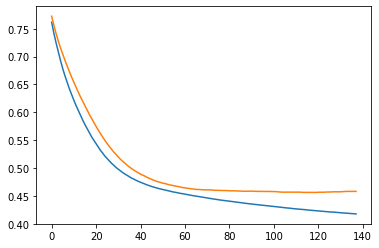

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

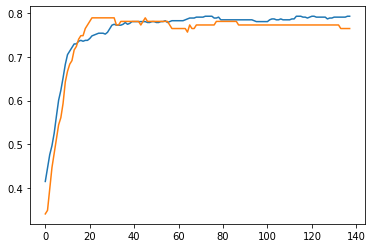

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])